# REFERENCE CODING EXAMPLE

In [15]:
import pandas as pd
import re
from nltk.corpus import stopwords
import string
from nltk.stem.snowball import SnowballStemmer

In [16]:
# Reading the data file into a DATAFRAME and checking the shape 
data=pd.read_csv('35.1AmazonMobileDataUncleaned.csv')
print("Original AmazonMobileDataSet size(Without DataCleaning & DataPreprocessing):",data.shape)

Original AmazonMobileDataSet size(Without DataCleaning & DataPreprocessing): (71922, 2)


# Data Cleaning

In [17]:
def datapreprocess(sen):
    
    sen = re.sub(r"didn't", "did not", sen)
    sen = re.sub(r"don't", "do not", sen)
    sen = re.sub(r"won't", "will not", sen)
    sen = re.sub(r"can't", "can not", sen)
    sen = re.sub(r"wasn't", "do not", sen)
    sen = re.sub(r"\'ve", " have", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"\'ll", " will", sen)
    sen = re.sub(r"\'re", " are", sen)
    sen = re.sub(r"\'s", " is", sen)
    sen = re.sub(r"\'d", " would", sen)
    sen = re.sub(r"\'t", " not", sen)
    sen = re.sub(r"\'m", " am", sen)
    sen = re.sub(r"n\'t", " not", sen)
    
    p = set(string.punctuation) # p take all the punctuations, punctuations displayed below
    sen=sen.lower() # convert text to lower case
    words=sen.split() # split the text into words
    ctext=[]
    for i in range(10): #adding numbers from 0 - 9 to p 
        p.add(str(i))
    for i in words:
        t=''.join([x for x in i.encode("ascii","ignore").decode("ascii") if x not in p]) # ignoring non ascii charecters and numbers
        ctext.append(t)
    return " ".join([i for i in ctext]) # joining the cleaned words to text
    
    

stop=set(stopwords.words('english'))
print(stop)
stop.remove('no')
stop.remove('not')
stop.remove('nor')

preprocessed_essays = []
for sentance in data['uncleanedreview'].values:
    try:
        ctxt=datapreprocess(str(sentance))
        if len(ctxt)==0: raise()
        ctxt = ' '.join(e for e in ctxt.split() if e not in stop)
        preprocessed_essays.append(ctxt.lower().strip())
    except:
        preprocessed_essays.append("NAN")  
data['cleanedtext'] = preprocessed_essays
data.drop(data[data["cleanedtext"]=="NAN"].index,axis = 0,inplace = True) # deleting rows that have no text 
data=data.reset_index(drop='true') # after deleting rows index should be reset
data['decision']= data['decision'].replace('positive',1)
data['decision']= data['decision'].replace('negative',0)


s = SnowballStemmer("english")
p=[]
for i in data['cleanedtext'].values:
    k=[]
    for word in i.split():
        k.append(s.stem(word))
    l=' '.join(k)
    p.append(l)

data['j']=p

data.to_csv (r'AmazonMobileDataCleaned.csv')

{'ain', "it's", 'being', 'don', 'theirs', 'isn', 'doesn', 'same', 'itself', 'how', 'until', 'what', 'these', "needn't", 'mustn', "doesn't", "couldn't", "you'd", "she's", 'should', "don't", 'if', 'between', "shan't", 'in', 'had', 'aren', "mightn't", 'needn', 'whom', 'she', 'm', 'under', "should've", 'having', 'on', 'to', 'this', 'him', 'your', 'over', 'we', 'myself', 'an', 'didn', 'again', 'haven', 'ourselves', 'y', "that'll", 'or', "won't", 'are', 'been', 'out', 'shouldn', 'off', 'down', 'd', 'their', 'has', 'have', 'weren', 'themselves', 'doing', 'ma', 'any', 'further', 'that', 'it', 'the', 'from', 'himself', "wasn't", 'be', 'why', "you'll", 'wasn', 'then', 'against', 'its', 'those', 'll', "weren't", 'through', 'because', 'not', "haven't", 'there', 'am', 'all', 'as', 'some', 'just', 'during', "aren't", 'up', 'does', 'each', 'hadn', 'at', "you've", "you're", "wouldn't", 'where', 'they', 'i', 'do', 'no', 'his', 'which', 'can', 't', 'once', 'such', 'my', 'couldn', 'her', 'after', 'more',

# Splitting Cleaned dataset into Train & Test datasets

In [18]:
data=pd.read_csv('AmazonMobileDataCleaned.csv',nrows = 5000) #since svm requires high speed processing computer, here we take only 5000 rows
print("AmazonMobileDataSet size(after DataCleaning): ",data.shape)
label = data['decision'].values
features = data.drop(['decision'], axis=1) #seperate output column
print("Label size(after DataCleaning):",label.shape)
print("Features size(after DataCleaning):",features.shape)
print("------------------------------")

from sklearn.model_selection import train_test_split
# random_state : DEFAULT = None
# random_state in train_test_split = 3 or AnyInteger : Reproducing the same dataset into Train and Test, everytime you run this cell
inputtrain, inputtest, outputtrain, outputtest = train_test_split(features, label, test_size=0.20, stratify=label)
print("Input Train dataset size(after DataCleaning):",inputtrain.shape)
print("Input Test dataset size(after DataCleaning):",inputtest.shape)
print("Output Train dataset size:",outputtrain.shape)
print("Output Test dataset size:",outputtest.shape)

AmazonMobileDataSet size(after DataCleaning):  (5000, 5)
Label size(after DataCleaning): (5000,)
Features size(after DataCleaning): (5000, 4)
------------------------------
Input Train dataset size(after DataCleaning): (4000, 4)
Input Test dataset size(after DataCleaning): (1000, 4)
Output Train dataset size: (4000,)
Output Test dataset size: (1000,)


# DataPreprocessing(BagOfWords) on Cleaned Train & Test datasets

In [19]:
# convert into Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vec = CountVectorizer(min_df=10,ngram_range=(1,4))
vec.fit(inputtrain['j'].values) # fit has to happen only on train data


train_cleanedtext = vec.transform(inputtrain['j'].values)
test_cleanedtext= vec.transform(inputtest['j'].values)

print("After vectorizations")
print("Input Train dataset size(after DataCleaning & DataPreprocessing):",train_cleanedtext.shape)
print("Input Test dataset size(after DataCleaning & DataPreprocessing):",test_cleanedtext.shape)
print("Output Train dataset size:",outputtrain.shape)
print("Output Test dataset size:",outputtest.shape)
print("...............................")

After vectorizations
Input Train dataset size(after DataCleaning & DataPreprocessing): (4000, 2898)
Input Test dataset size(after DataCleaning & DataPreprocessing): (1000, 2898)
Output Train dataset size: (4000,)
Output Test dataset size: (1000,)
...............................


# Use GridSearchCV() to find best value for hyper-parameter(C)

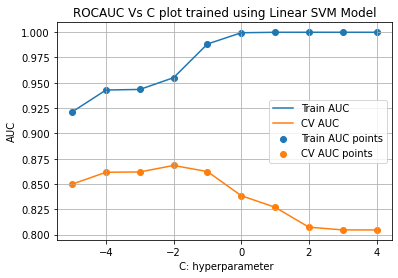

Best C value for SVM Model: 0.01
ROCAUC value for SVM Model which has Best hyper-parameter i.e C=0.01 : 0.868311467162042
best C log value
-2.0


In [20]:
# Packages required
# some of the code taken from stack overflow
import math
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

#https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# NOTE: we can also use linear_model.SGDClassifier(loss='hinge',max_iter=5000,penalty='l2') ---> If the Original dataSet is Linearly seperable
neigh = SVC(kernel = 'linear')

C=np.array([0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]) # Different C values
tuned_parameters = {'C' : C} 


clf = GridSearchCV(neigh, tuned_parameters, cv=5, scoring='roc_auc',return_train_score='true') 
clf.fit(train_cleanedtext, outputtrain)

results = pd.DataFrame.from_dict(clf.cv_results_)#please check the output of cv_results_
#  gridsearchcv execution will understand. concepts required KFold cross validation
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']

cv_auc = results['mean_test_score'] 

k =  results['param_C']

alpha1=[]
for i in range(0,len(k),1):
   l=math.log10(k[i])
   alpha1.append(l)
alpha1.sort()
plt.plot(alpha1, train_auc, label='Train AUC')

plt.plot(alpha1, cv_auc, label='CV AUC')

plt.scatter(alpha1, train_auc, label='Train AUC points')
plt.scatter(alpha1, cv_auc, label='CV AUC points')

plt.legend()
plt.xlabel(" C: hyperparameter")
plt.ylabel("AUC")
# Model - SVM (Linear)
# Different C value means - Model is trained using different functions(f)
plt.title("ROCAUC Vs C plot trained using Linear SVM Model")
plt.grid()
plt.show()

# For SVM Models having different Hyper-parameter(C) values([0.00001,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]), we have corresponding ROC plot(AUC value)
# Among all the above SVM Model, we will be having Best Hyper-parameter(C) value that has Maximimum AUC for ROC plot
# we choose that SVM Model which has BEST C(MAXIMUM AUC for ROC PLOTS)
#print(clf.best_params_)
print("Best C value for SVM Model:",clf.best_params_['C']) 
print(f"ROCAUC value for SVM Model which has Best hyper-parameter i.e C={clf.best_params_['C']} :",clf.best_score_)
print("best C log value")
C_log=math.log10(clf.best_params_.get('C'))
print(C_log)

# Use best hyper-parameter(C) in SVM Model & Train the model, compute best threshold. Plot the confusion matrix for that best threshold

--------------------
SVM Model trained using best hyper-parameter i.e C=0.01
--------------------


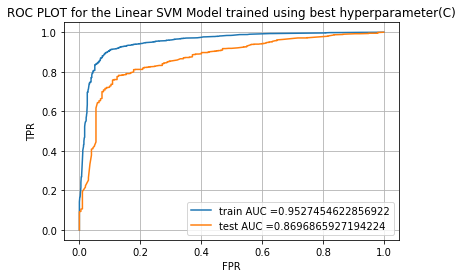

---------------------------------------------------
SVM Model trained using best hyper-parameter C i.e C=0.01
Best Threshold value is 0.731 which has maximum value of tpr*(1-fpr)=0.819644723092999

Train confusion matrix for best threshold value(0.7308807134894092)


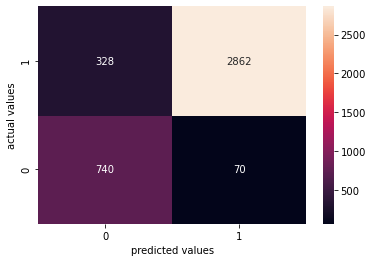

Test confusion matrix for best threshold value(0.7308807134894092)


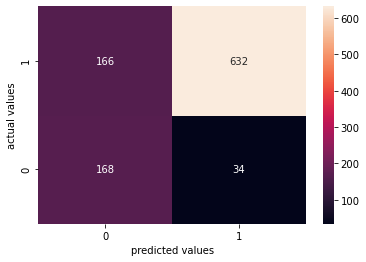

In [21]:

from sklearn.metrics import roc_curve, auc
import seaborn as sns
from sklearn.calibration import CalibratedClassifierCV

# NOTE: kernal=rbf must be same as used in GridSearchCV,
# NOTE: C value must be the best hyper-parameter produced from previous step
neigh = SVC(kernel = 'linear',C=clf.best_params_['C'])
neigh.fit(train_cleanedtext, outputtrain)

print(20*'-')
print(f"SVM Model trained using best hyper-parameter i.e C={clf.best_params_['C']}")
print(20*'-')

clfcalibrated = CalibratedClassifierCV(neigh, cv=3, method='isotonic') # SVC() not produce probabilities value
clfcalibrated.fit(train_cleanedtext, outputtrain)

# Model SVM(linear) trained using best hyper-parameter(C) generates Predicted Probabilities for Train & Test Inputs.
# We plot ROCAUC plot for the Linear SVM Model trained using best hyperparameter(C)
# We identify BestThreshold value (np.argmax(tpr*(1-fpr)) for the Linear SVM Model trained using best hyperparameter(C)
# Use that best threshold to generate confusion matrix for both Train & Test datasets

y_train_pred = clfcalibrated.predict_proba(train_cleanedtext)[:,1] #generate probabilities for Training datasets   
y_test_pred = clfcalibrated.predict_proba(test_cleanedtext)[:,1]
#print(y_test_pred)
train_fpr, train_tpr, tr_thresholds = roc_curve(outputtrain, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(outputtest, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
# Model - SVM (Linear)
# Different C value means - Model is trained using different functions
plt.title("ROC PLOT for the Linear SVM Model trained using best hyperparameter(C)")
plt.grid()
plt.show()


def bestthreshold(threshould, fpr, tpr):# function to predict best threshold
    t = threshould[np.argmax(tpr*(1-fpr))]
    
    #print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    print(f"SVM Model trained using best hyper-parameter C i.e C={clf.best_params_['C']}")
    print(f"Best Threshold value is {np.round(t,3)} which has maximum value of tpr*(1-fpr)={max(tpr*(1-fpr))}")
    return t

def predictusingbestt(proba, threshould):#prediction using best threshold
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

print("---------------------------------------------------")


from sklearn.metrics import confusion_matrix
best_t = bestthreshold(tr_thresholds, train_fpr, train_tpr) # Training FPR,TPR is considered for best threshold
print(f"\nTrain confusion matrix for best threshold value({best_t})")

ax=sns.heatmap(confusion_matrix(outputtrain, predictusingbestt(y_train_pred, best_t)),annot=True,fmt='d')
ax.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()
print(f"Test confusion matrix for best threshold value({best_t})")


bx=sns.heatmap(confusion_matrix(outputtest, predictusingbestt(y_test_pred, best_t)),annot=True,fmt='d')
bx.set_ylim([0,2])

plt.ylabel('actual values')
plt.xlabel('predicted values')
plt.show()

In [ ]:
# Linear SVM works best for AmazonMobile datasets rather than Linear SVM Model
# Maximum tpr*(1-fpr) = 0.819644723092999


# ROC AUC value for both train & test dataset is similar(too close) using this Linear SVM Model